In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight   # 👈 add this
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [17]:
# ------------------ 1) Load Dataset ------------------
df = pd.read_csv("heart_train.csv")

X = df[[
    "Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol",
    "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina",
    "Oldpeak", "ST_Slope"
]]
y = df["HeartDisease"]


In [18]:
# ------------------ 2) Encode Categoricals ------------------
X_encoded = X.copy()
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])


In [19]:
# ------------------ 3) Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# ------------------ 4) Scale Features ------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# ------------------ 5) Compute Class Weights ------------------
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: np.float64(1.1202290076335877), 1: np.float64(0.9030769230769231)}


In [22]:
# ------------------ 6) Build Model ------------------
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

C:\Users\keepu\Downloads\Analysing-of-Resumes\myenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# ------------------ 7) Train Model ------------------
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,            # 👈 train longer
    batch_size=32,
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5193 - loss: 0.6961 - val_accuracy: 0.8027 - val_loss: 0.5675
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7801 - loss: 0.5357 - val_accuracy: 0.7959 - val_loss: 0.4519
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8263 - loss: 0.4368 - val_accuracy: 0.8435 - val_loss: 0.4074
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8597 - loss: 0.3495 - val_accuracy: 0.8503 - val_loss: 0.4061
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8470 - loss: 0.3582 - val_accuracy: 0.8299 - val_loss: 0.4021
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8835 - loss: 0.3313 - val_accuracy: 0.8367 - val_loss: 0.4020
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8478 - loss: 0.3715 - val_accuracy: 0.8367 - val_loss: 0.3877
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8385 - loss: 0.3488 - val_accuracy: 0.8435 - val_loss

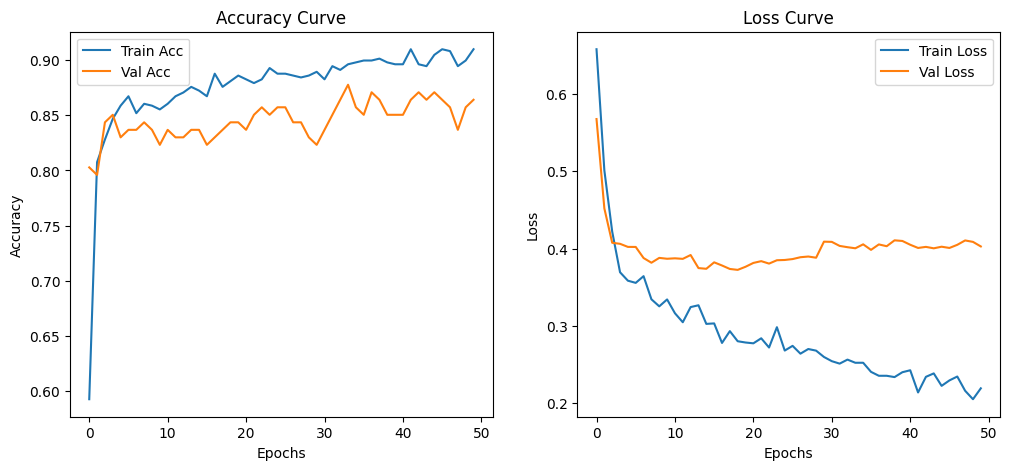

In [24]:
# ------------------ 8) Plot Learning Curves ------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()

In [25]:
# ------------------ 9) Evaluate ------------------
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Confusion Matrix:
 [[57  9]
 [11 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        66
           1       0.89      0.86      0.88        81

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147



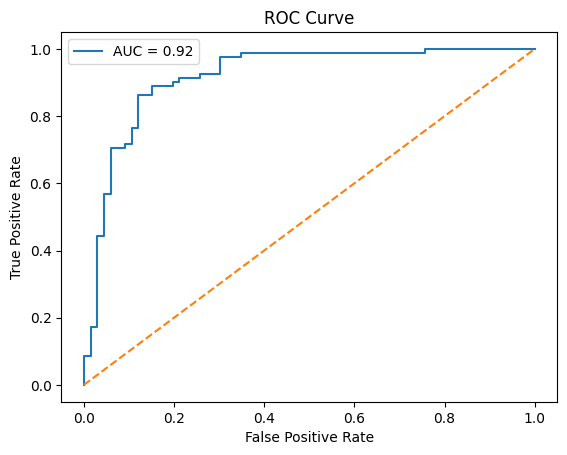

In [26]:
# ------------------ 10) ROC Curve ------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

In [27]:
import pickle

# ------------------ Save Scaler ------------------
with open("scaler2.pkl", "wb") as f:
    pickle.dump(scaler, f)

# ------------------ Save Model ------------------
model.save("model1.keras")   # Keras format


In [28]:
import pickle
import numpy as np

# Load scaler
with open("scaler2.pkl", "rb") as f:
    scaler = pickle.load(f)

# Generate random sample inputs (similar to training features)
# [age, sex, chestPainType, restingBP, cholesterol, fastingBS,
#  restingECG, maxHR, exerciseAngina, oldpeak, stSlope]
samples = np.array([
    [45, 1, 2, 120, 230, 0, 1, 150, 0, 1.0, 2],  # Low-risk profile
    [65, 1, 4, 160, 300, 1, 2, 90, 1, 3.5, 1],   # High-risk profile
])

# Scale inputs
scaled_samples = scaler.transform(samples)

# Predict probabilities
preds = model.predict(scaled_samples)
print(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\keepu\Downloads\Analysing-of-Resumes\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.00332122]
 [0.99517685]]


In [29]:
import numpy as np

# Generate 20 random realistic inputs
random_inputs = np.random.rand(20, 11) * np.array([80, 1, 4, 200, 400, 1, 2, 200, 1, 5, 3])
scaled_random = scaler.transform(random_inputs)

# Predict on random samples
preds = model.predict(scaled_random)
print("Predictions:", preds.flatten())

# Count class-wise distribution
print("Class 0 Count:", np.sum(preds < 0.5))
print("Class 1 Count:", np.sum(preds >= 0.5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions: [8.3389139e-01 1.2107012e-01 9.9893957e-01 9.9793196e-01 9.9995214e-01
 9.9319690e-01 9.9991077e-01 5.2855706e-01 9.9994081e-01 9.8193932e-01
 3.5023239e-01 9.9497056e-01 8.0302186e-02 2.1119229e-05 6.7047489e-01
 2.7671182e-01 8.3902335e-01 9.9988335e-01 2.5480310e-02 9.9971789e-01]
Class 0 Count: 6
Class 1 Count: 14


C:\Users\keepu\Downloads\Analysing-of-Resumes\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
